In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from glob import glob

from datagen import *
import os

from matplotlib import pyplot as plt

torch.manual_seed(0)
np.random.seed(0)

In [2]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        self.image_width = 3840
        self.latent_dims = 4
        self.e1 = nn.Linear(self.image_width,int(self.image_width/2))
        self.e2 = nn.Linear(int(self.image_width/2),int(self.image_width/4))
        self.e3 = nn.Linear(int(self.image_width/4),int(self.image_width/8))
        self.e4 = nn.Linear(int(self.image_width/8),int(self.image_width/16))
        self.e5 = nn.Linear(int(self.image_width/16),int(self.image_width/32))       
        self.e6 = nn.Linear(int(self.image_width/32),int(self.image_width/64))
        self.e7 = nn.Linear(int(self.image_width/64),int(self.image_width/128))
        self.e8 = nn.Linear(int(self.image_width/128),int(self.image_width/256))
        self.elinear1 = nn.Linear(int(self.image_width/256),int(self.latent_dims))
        self.elinear2 = nn.Linear(int(self.image_width/256),int(self.latent_dims))
                                                                                                
        ## decoder Layers
        
        self.d1 = nn.Linear(int(self.image_width/2),int(self.image_width))
        self.d2 = nn.Linear(int(self.image_width/4),int(self.image_width/2))
        self.d3 = nn.Linear(int(self.image_width/8),int(self.image_width/4))
        self.d4 = nn.Linear(int(self.image_width/16),int(self.image_width/8))
        self.d5 = nn.Linear(int(self.image_width/32),int(self.image_width/16))       
        self.d6 = nn.Linear(int(self.image_width/64),int(self.image_width/32))
        self.d7 = nn.Linear(int(self.image_width/128),int(self.image_width/64))
        self.d8 = nn.Linear(int(self.image_width/256),int(self.image_width/128))
        self.dlinear1 = nn.Linear(int(self.latent_dims),int(self.image_width/256))
        
    def encode(self, x):
        x = self.e1(x)
        x = F.leaky_relu(x)
        x = self.e2(x)
        x = F.leaky_relu(x)
        x = self.e3(x)
        x = F.leaky_relu(x)
        x = self.e4(x)
        x = F.leaky_relu(x)
        x = self.e5(x)
        x = F.leaky_relu(x)
        x = self.e6(x)
        x = F.leaky_relu(x)
        x = self.e7(x)
        x = F.leaky_relu(x)
        x = self.e8(x)
        x = F.leaky_relu(x)
        mean = self.elinear1(x)
        logvar = self.elinear2(x)
        return mean, logvar

    def decode(self, z): 
        x = self.dlinear1(z)
        x = F.leaky_relu(x)
        x = self.d8(x)
        x = F.leaky_relu(x)
        x = self.d7(x)
        x = F.leaky_relu(x)
        x = self.d6(x)
        x = F.leaky_relu(x)
        x = self.d5(x)
        x = F.leaky_relu(x)
        x = self.d4(x)
        x = F.leaky_relu(x)
        x = self.d3(x)
        x = F.leaky_relu(x)
        x = self.d2(x)
        x = F.leaky_relu(x)
        x = self.d1(x)
        x = torch.relu(x)
        return x 
	
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar 

In [15]:
np.random.seed(10)
a = np.random.uniform(-800, 800, 64).reshape(-1, 1)
print (a)

[[ 434.11302923]
 [-766.79688102]
 [ 213.83717588]
 [ 398.08621206]
 [  -2.38878032]
 [-440.32536715]
 [-483.09941638]
 [ 416.84913952]
 [-529.4226615 ]
 [-658.65629732]
 [ 296.57570939]
 [ 725.42935391]
 [-793.68277388]
 [  19.50762142]
 [ 500.19353864]
 [ 180.04170693]
 [ 354.80850789]
 [-332.99829093]
 [ 668.43859602]
 [ 343.32125344]
 [  68.07098882]
 [-572.52792384]
 [-202.65478392]
 [ 278.61378411]
 [ -93.06692092]
 [-105.57761067]
 [ 188.42716555]
 [  21.02118809]
 [ 240.63549109]
 [ 161.66232545]
 [ 488.35711493]
 [  34.63544383]
 [ 653.83820929]
 [-289.22225762]
 [-655.26504117]
 [-318.87990938]
 [-617.62502102]
 [ 525.89012209]
 [-724.96588898]
 [ 202.0594373 ]
 [  76.13784947]
 [ 510.85919307]
 [-481.68393651]
 [ 570.96048393]
 [-237.35577691]
 [ 407.43630645]
 [-326.46126899]
 [ 614.2983673 ]
 [-279.18137947]
 [-535.97456365]
 [-171.95320969]
 [-650.46340071]
 [ 513.76905254]
 [-558.15676857]
 [-185.41688209]
 [ 710.81713958]
 [ 780.20075984]
 [ -69.91272465]
 [ 521.7965501

In [19]:
np.random.seed(10)
a = np.random.uniform(-800, 800, 10).reshape(-1, 1)
print (a)

[[ 434.11302923]
 [-766.79688102]
 [ 213.83717588]
 [ 398.08621206]
 [  -2.38878032]
 [-440.32536715]
 [-483.09941638]
 [ 416.84913952]
 [-529.4226615 ]
 [-658.65629732]]


In [24]:
data1 = generate_raw_batch_data(N=64, seed=0)
data2 = generate_raw_batch_data(N=10, seed=0)

In [29]:
data1.shape, data2.shape

((64, 3840), (10, 3840))

In [30]:
data1[0]

array([3.15843310e+02, 3.15631902e+02, 3.15420450e+02, ...,
       1.12698012e-01, 5.63466690e-02, 0.00000000e+00])

<IPython.core.display.Javascript object>


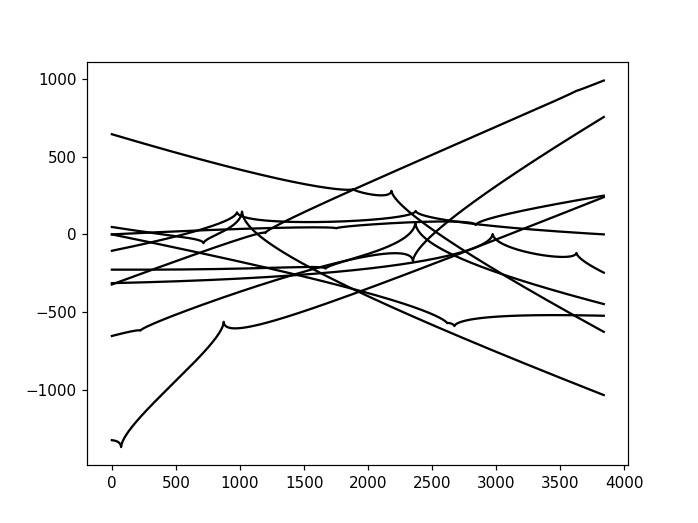

IndexError: index 10 is out of bounds for axis 0 with size 10

In [25]:
%matplotlib notebook

for i in range(data1.shape[0]):
    plt.plot(data1[i]-data2[i], 'k')
    #plt.plot(data2[i], 'b')

In [27]:
cwd = os.getcwd()

#create model
latent_dim = 4 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device=device)
num_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
print('Number of parameters: %d' % num_params)

vae.load_state_dict(torch.load("vae.pth"))


Number of parameters: 19672178


<All keys matched successfully>

(10, 3840) (10, 3840)


<IPython.core.display.Javascript object>


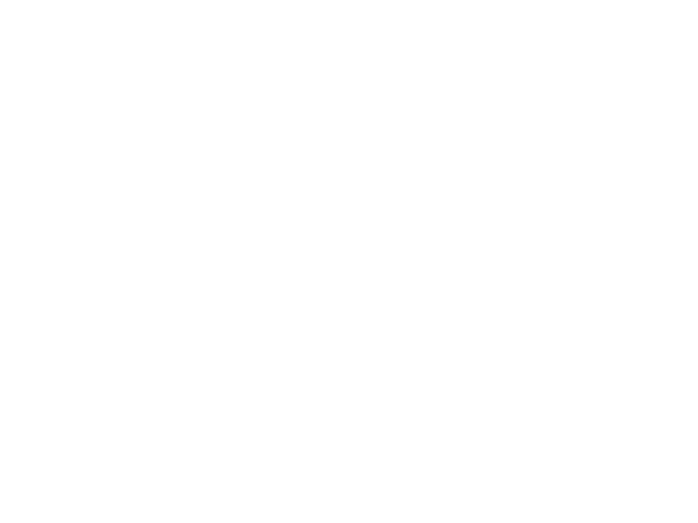

<IPython.core.display.Javascript object>


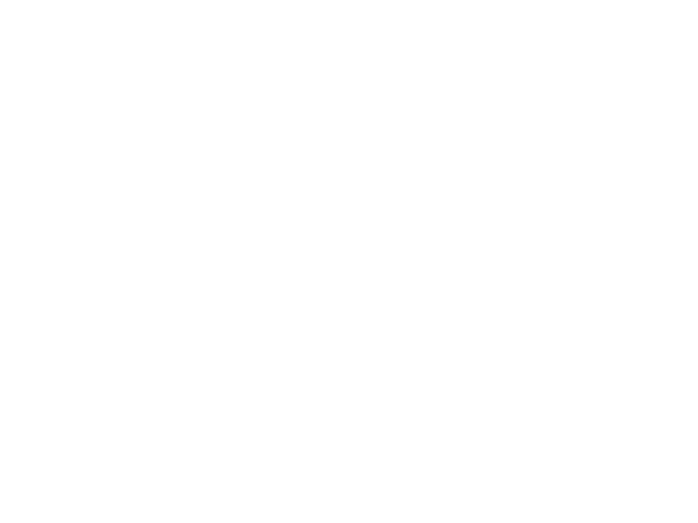

<IPython.core.display.Javascript object>


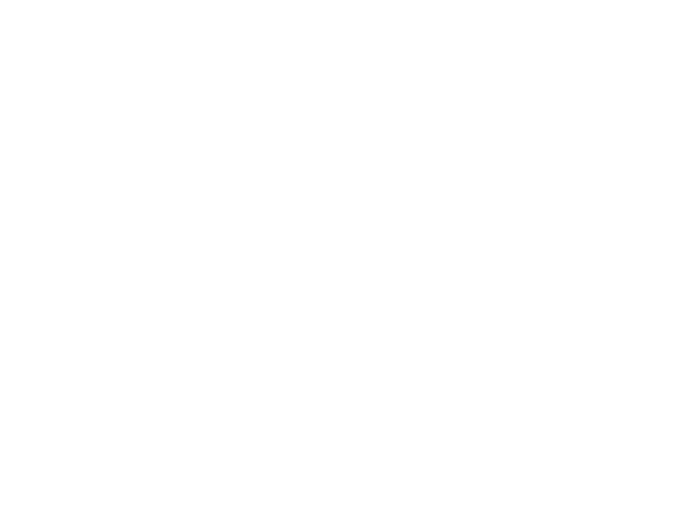

<IPython.core.display.Javascript object>


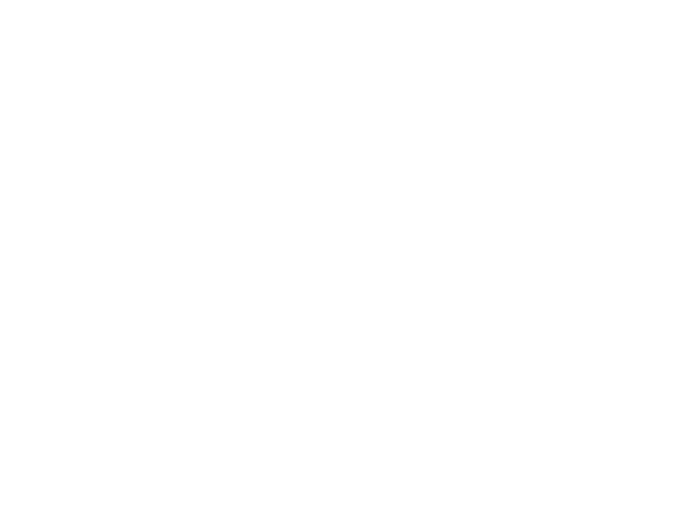

<IPython.core.display.Javascript object>


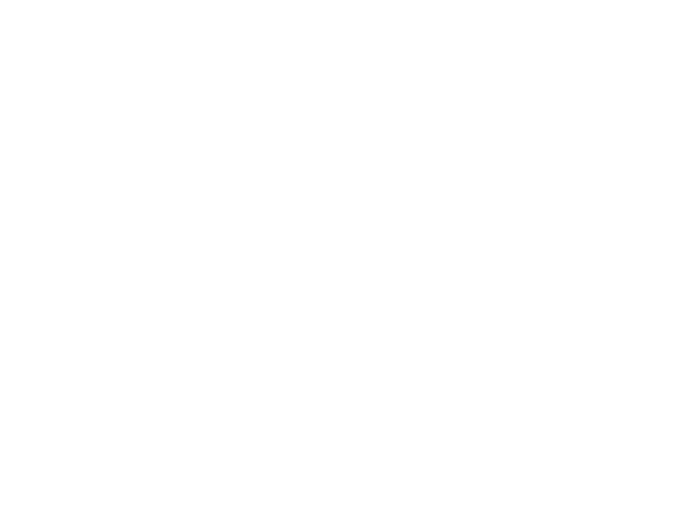

<IPython.core.display.Javascript object>


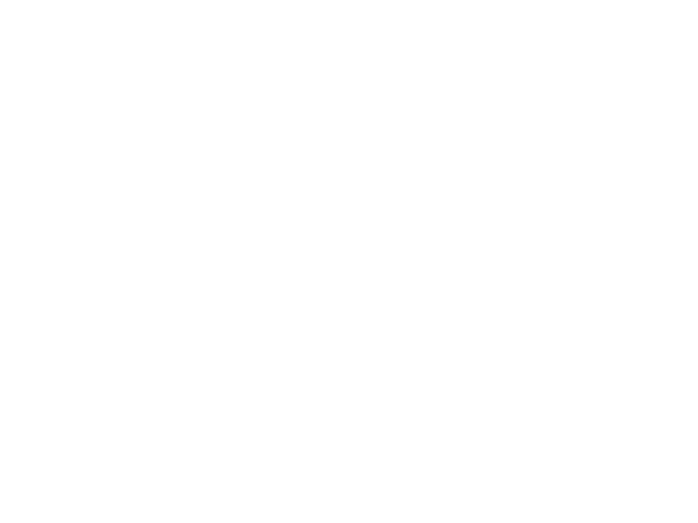

<IPython.core.display.Javascript object>


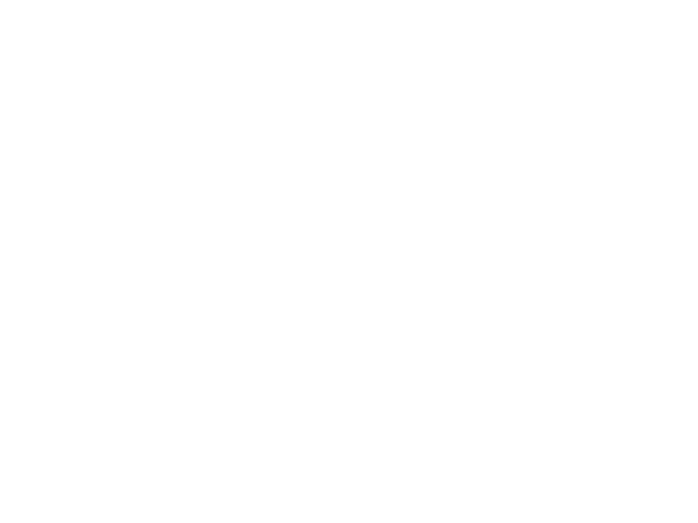

<IPython.core.display.Javascript object>


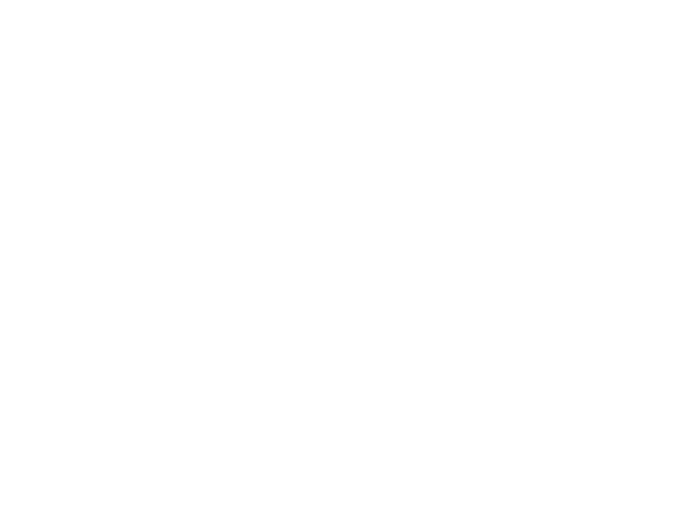

<IPython.core.display.Javascript object>


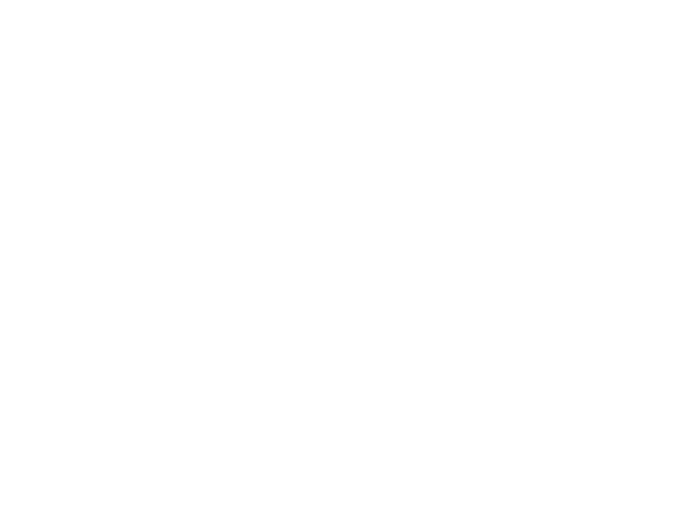

<IPython.core.display.Javascript object>


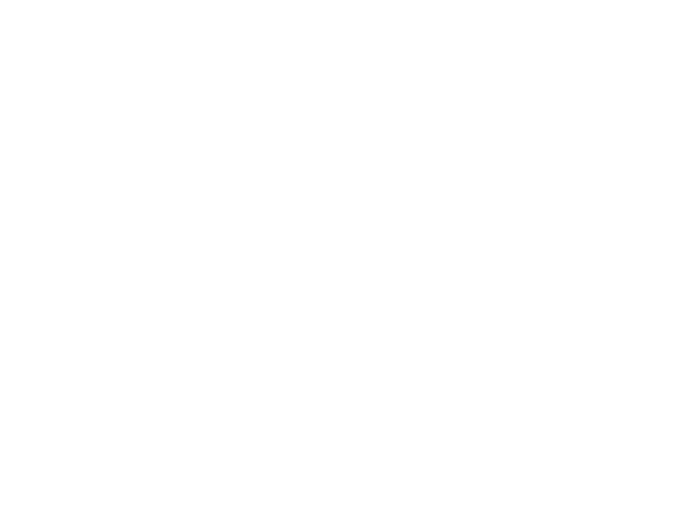

(10, 3840) (10, 3840)


<IPython.core.display.Javascript object>


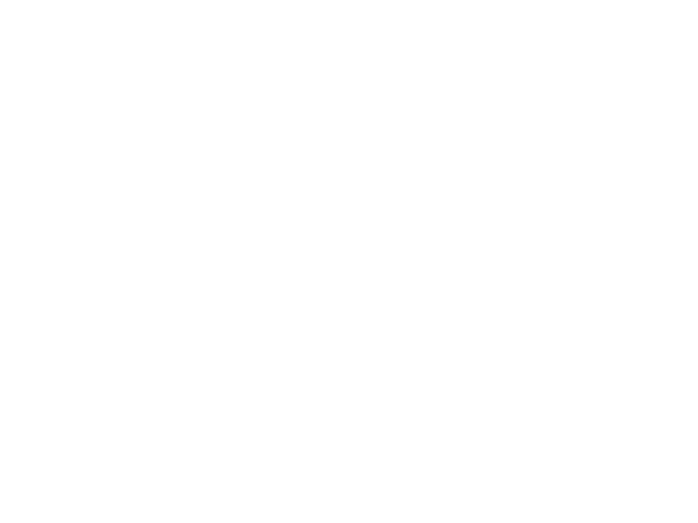

<IPython.core.display.Javascript object>


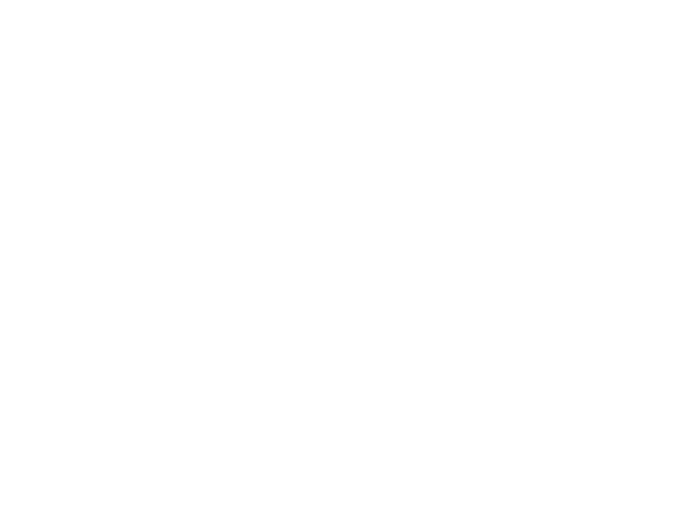

<IPython.core.display.Javascript object>


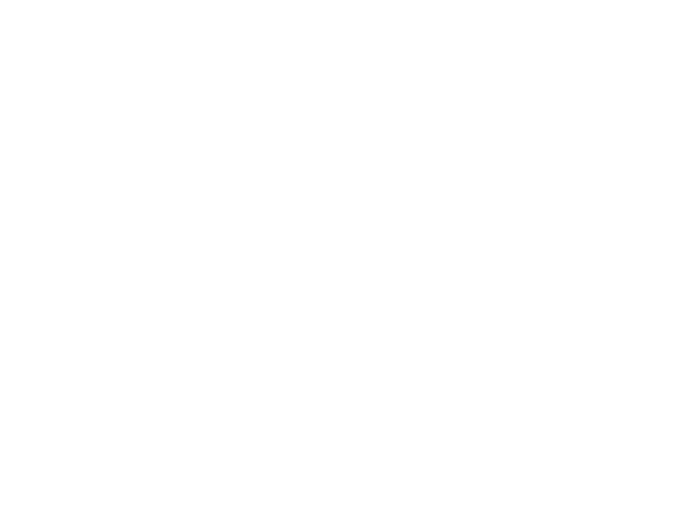

<IPython.core.display.Javascript object>


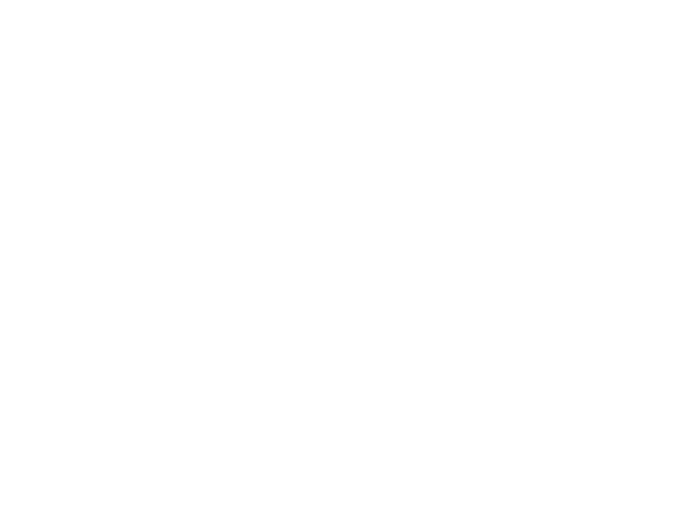

<IPython.core.display.Javascript object>


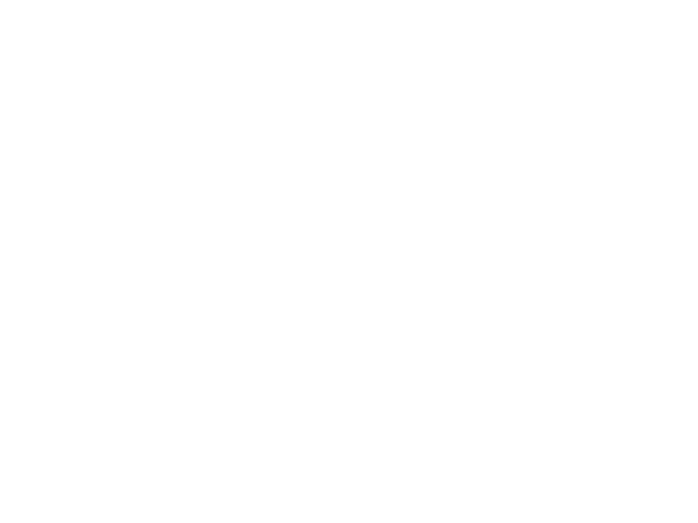

<IPython.core.display.Javascript object>


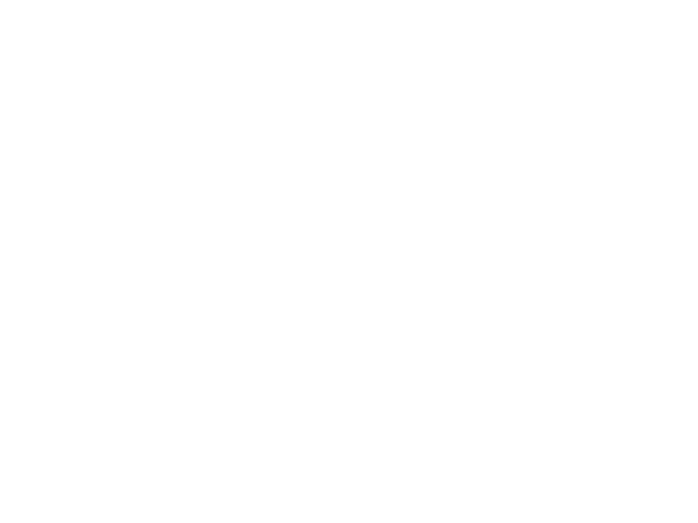

<IPython.core.display.Javascript object>


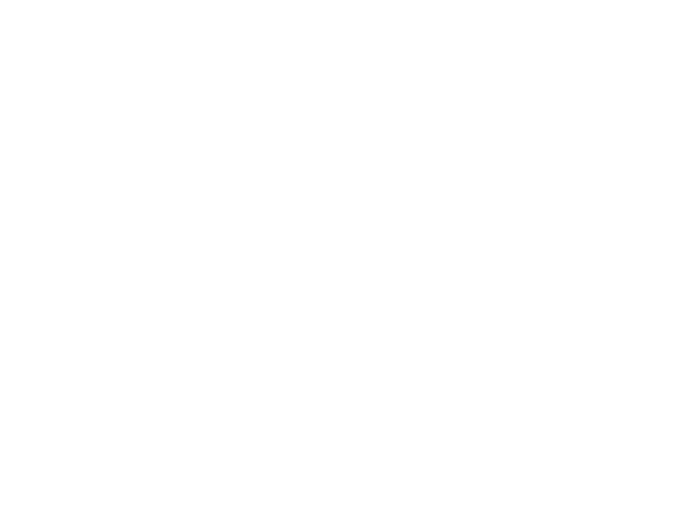

<IPython.core.display.Javascript object>


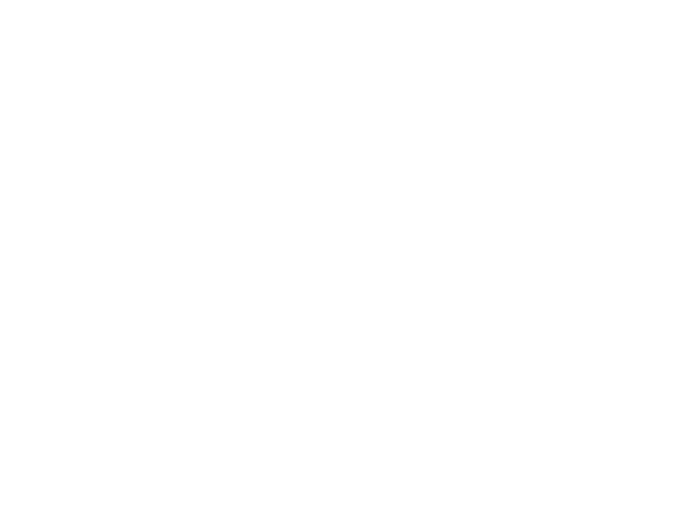

<IPython.core.display.Javascript object>


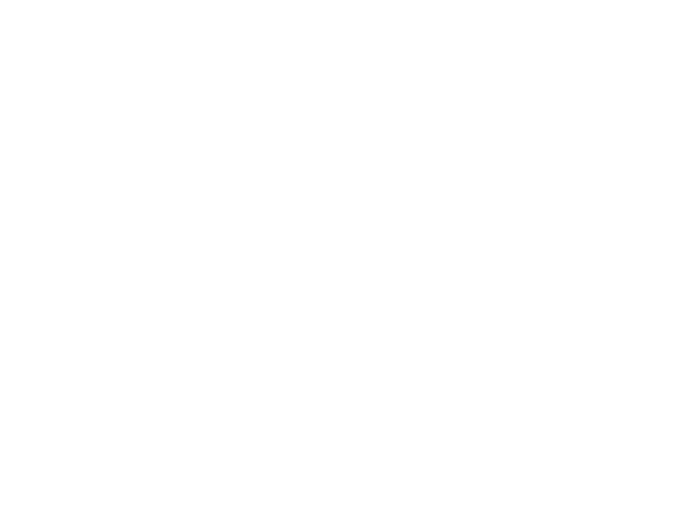

<IPython.core.display.Javascript object>


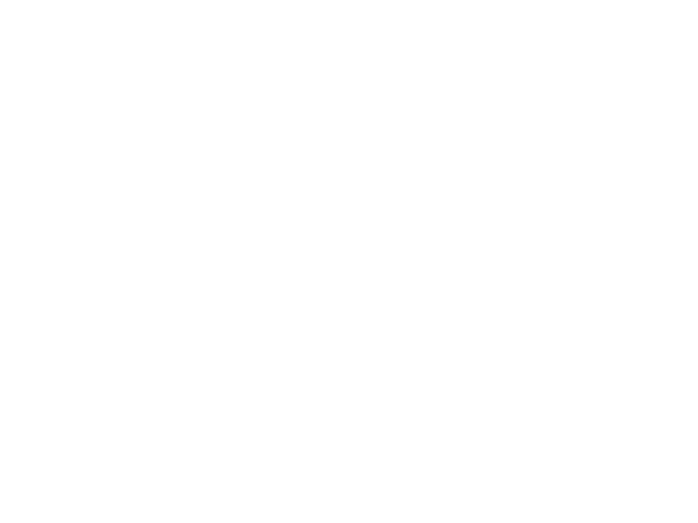

(10, 3840)


<IPython.core.display.Javascript object>


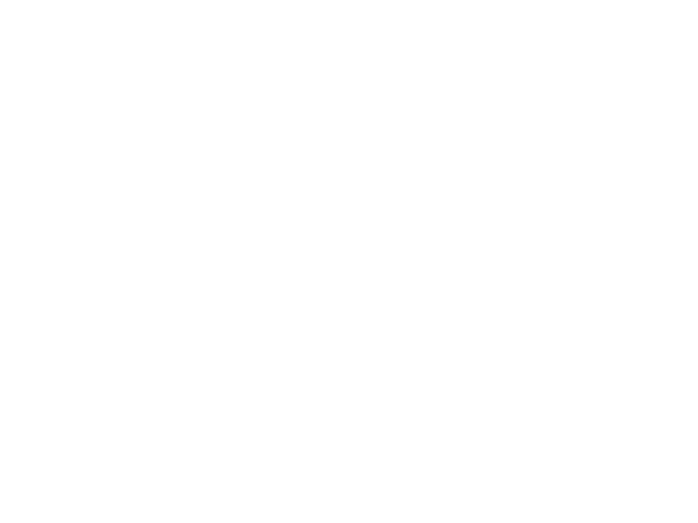

<IPython.core.display.Javascript object>


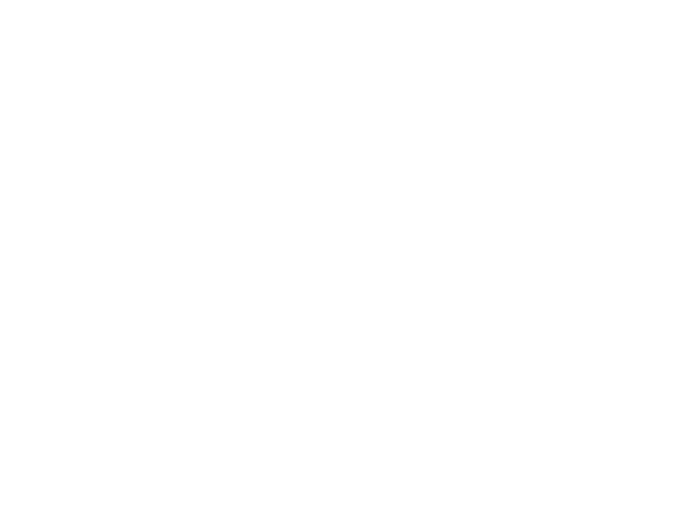

<IPython.core.display.Javascript object>


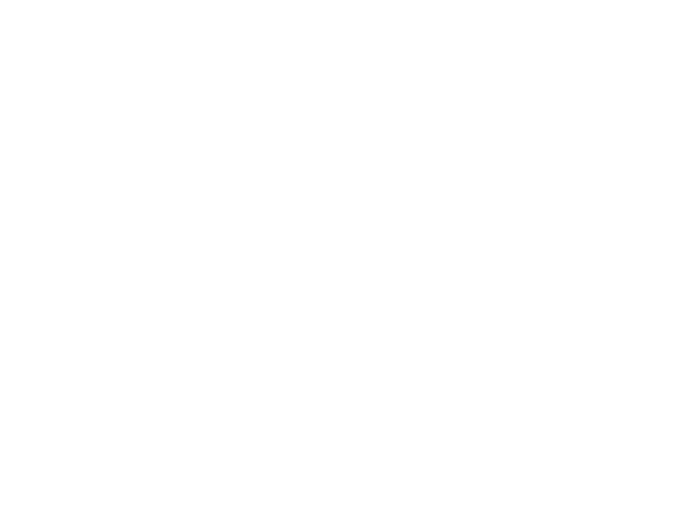

<IPython.core.display.Javascript object>


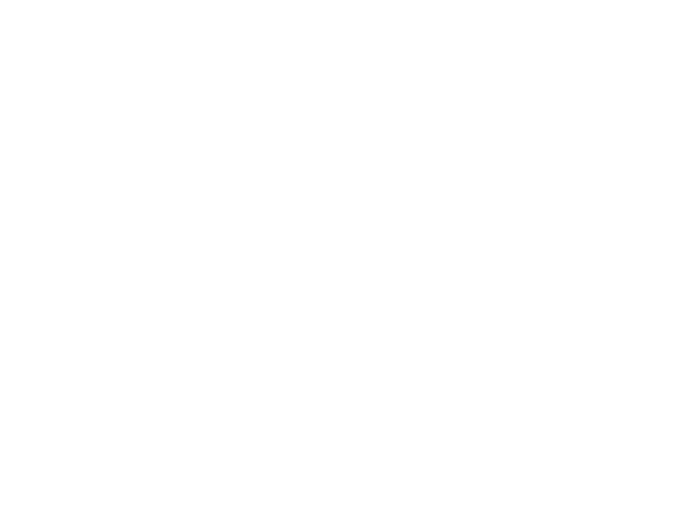

<IPython.core.display.Javascript object>


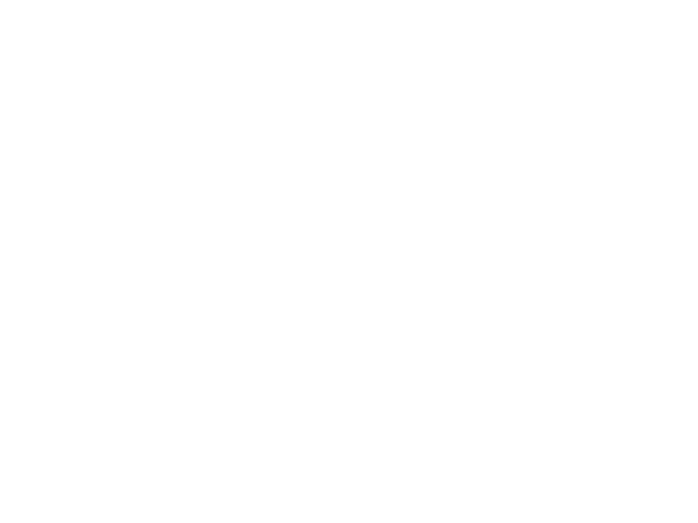

<IPython.core.display.Javascript object>


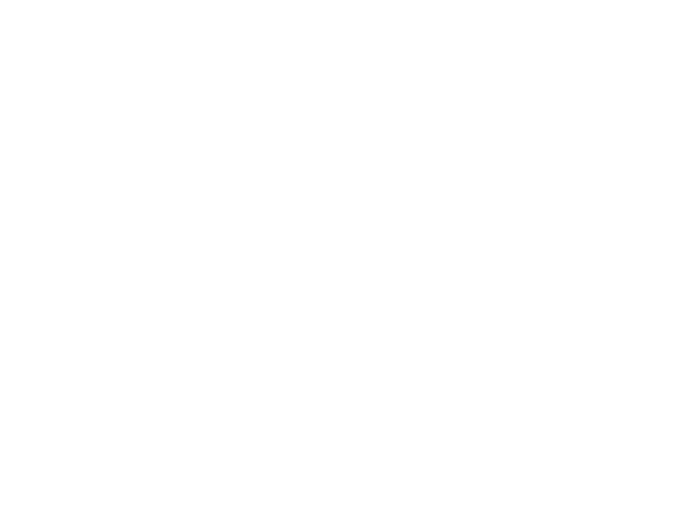

<IPython.core.display.Javascript object>


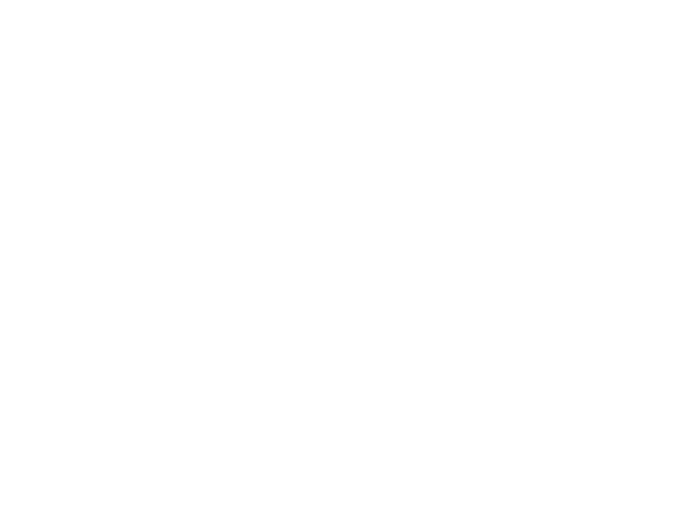

<IPython.core.display.Javascript object>


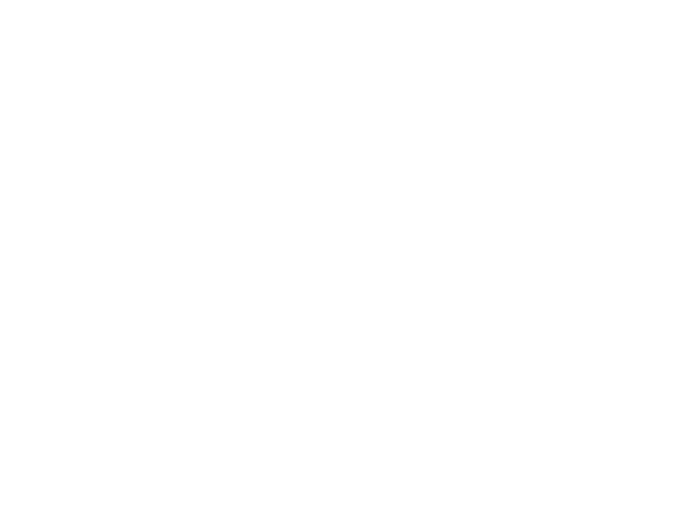

<IPython.core.display.Javascript object>


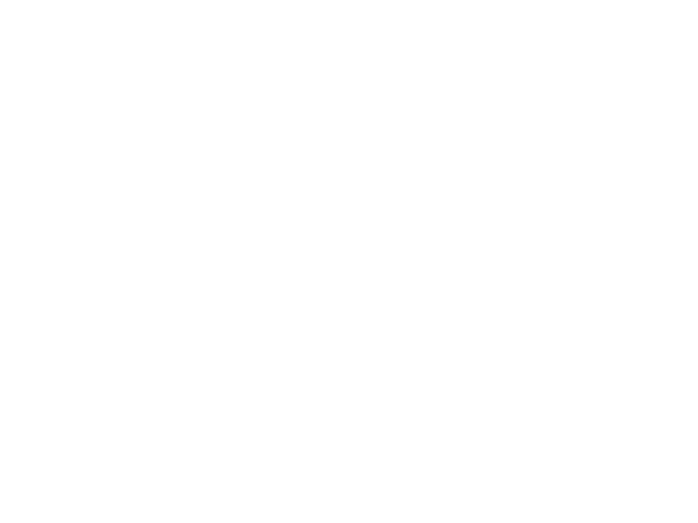

<IPython.core.display.Javascript object>


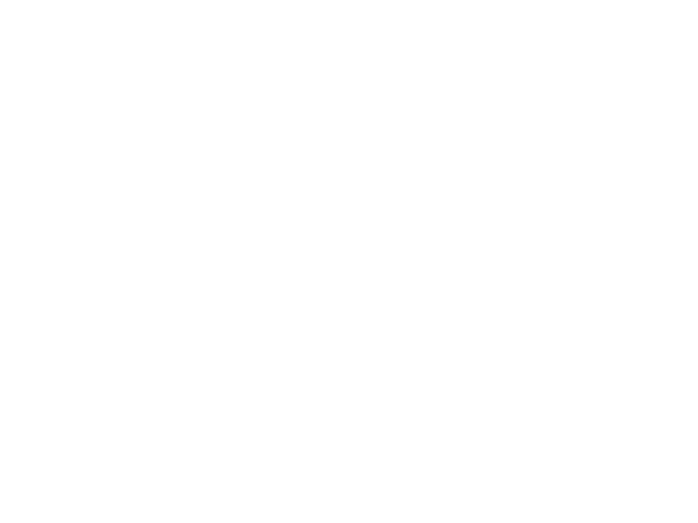

In [28]:
#evaluation 1: recreate samples on training set
num_samples = 10

data = generate_raw_batch_data(N=num_samples, seed=0)
#data = data.reshape((data.shape[0], 1, data.shape[1]))
data = data.astype('float32')
data_gt = data
data = torch.from_numpy(data)
data = data.to(device)
data_recon, mu, logvar = vae(data)
data_recon = torch.detach(data_recon).numpy()

#data_gt = data_gt.reshape((data_gt.shape[0], data_gt.shape[2]))
#data_recon = data_recon.reshape((data_recon.shape[0], data_recon.shape[2]))
print (data_gt.shape, data_recon.shape)

for i in range(len(data_gt)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(data_gt[i])
    ax2.plot(data_recon[i])
    plt.savefig("train"+str(i)+".png")
    plt.close()


#evaluation 2: recreate samples on test set
num_samples = 10

data = generate_raw_batch_data(N=num_samples, seed=100)
#data = data.reshape((data.shape[0], 1, data.shape[1]))
data = data.astype('float32')
data_gt = data
data = torch.from_numpy(data)
data = data.to(device)
data_recon, mu, logvar = vae(data)
data_recon = torch.detach(data_recon).numpy()

#data_gt = data_gt.reshape((data_gt.shape[0], data_gt.shape[2]))
#data_recon = data_recon.reshape((data_recon.shape[0], data_recon.shape[2]))
print (data_gt.shape, data_recon.shape)

for i in range(len(data_gt)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(data_gt[i])
    ax2.plot(data_recon[i])
    plt.savefig("test"+str(i)+".png")
    plt.close()


#evaluation 3: generate new samples
num_samples = 10
z = torch.randn(num_samples, 4)
data_gen = vae.decode(z)
data_gen = torch.detach(data_gen).numpy()

#data_gen = data_gen.reshape((data_gen.shape[0], data_gen.shape[2]))
print (data_gen.shape)

for i in range(len(data_gt)):
    fig, ax = plt.subplots(1, 1)
    ax.plot(data_gen[i])
    plt.savefig("gen"+str(i)+".png")
    plt.close()

